<a href="https://colab.research.google.com/github/hayrullahcanozkan/BTK-PythonTensorflow/blob/master/Practical_Statistics_for_data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRATİCAL STATISTICS FOR DATA SCIENTISTS

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
teams=pd.read_excel(r'/content/gdrive/My Drive/Practice/Teams.xlsx')
medals=pd.read_excel(r'/content/gdrive/My Drive/Practice/Medals.xlsx')
entriesGender=pd.read_excel(r'/content/gdrive/My Drive/Practice/EntriesGender.xlsx')
coaches=pd.read_excel(r'/content/gdrive/My Drive/Practice/Coaches.xlsx')
athletes=pd.read_excel(r'/content/gdrive/My Drive/Practice/Athletes.xlsx')


/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


ESTİMATE OF LOCATION


In [ ]:
medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [ ]:
medals['Total'].mean()

11.612903225806452

In [ ]:
import numpy as np


In [ ]:
np.average(medals['Total'], weights=medals['Gold'])

46.832352941176474

In [ ]:
#TRİMMED MEAN
import pandas as pd
from scipy.stats import trim_mean
trim_mean(medals['Gold'],0.1)

1.96

In [ ]:
#Median
medals['Total'].median()

4.0

In [ ]:
medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [ ]:
wavarag=(medals['Gold']*medals['Total']).sum()/medals['Total'].sum()
wavarag

14.743518518518519

In [ ]:
#Weighted Median
import pandas as pd
def weighted_median(df, median_col,weight_col):
  df_sorted=df.sort_values(median_col)
  cumsum=df_sorted[weight_col].cumsum()
  cutoff= df_sorted[weight_col].sum()/2
  return df_sorted[cumsum>=cutoff][median_col].iloc[0]

In [ ]:
weighted_median(medals,'Total','Gold')

40

In [ ]:
#PERCENTILE
import numpy as np
q3=np.percentile(medals['Total'],75)
q3

11.0

In [ ]:
medals.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


ESTIMATES OF VARIABILITY (DISPERSION METRİCS)




In [ ]:
from statistics import variance

In [ ]:
#varyans, bir örnek veya veri kümesi içindeki veri noktalarının ne kadar yayılmış olduğunun istatistiksel bir ölçüsüdür.
variance(medals['Gold'])

49.315100514259

In [ ]:
# varyansın kök içine alınmış hali
from statistics import stdev 
stdev(medals['Gold'])

7.022471111671376

In [ ]:
#Mean absolute deviation
from numpy import mean , absolute
mean(absolute(medals['Gold']-mean(medals['Gold'])))



4.0048560527228565

In [ ]:
#Median absolute deviation
from numpy import median , absolute
median(absolute(medals['Gold']-median(medals['Gold'])))


1.0

In [ ]:
#Interquartile Range
q3, q1=np.percentile(medals['Gold'],[75,25])
iqr= q3- q1 
iqr

3.0

EXPLORING THE DATA DISTRIBUION



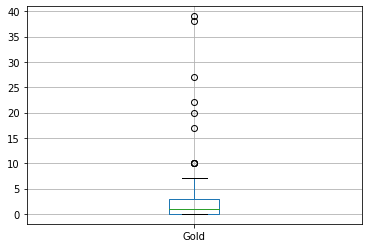

In [ ]:
#BOX PLOTS
medals.boxplot(column='Gold')

In [ ]:
#Frequency tables and histograms
frequency_table=medals.copy()
frequency_table['Frequency']= pd.cut(medals['Gold'],10)
frequency_table.groupby('Frequency')['Rank'].count().reset_index()

,Frequency,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


(array([72., 11.,  4.,  0.,  1.,  2.,  1.,  0.,  0.,  2.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <a list of 10 Patch objects>)

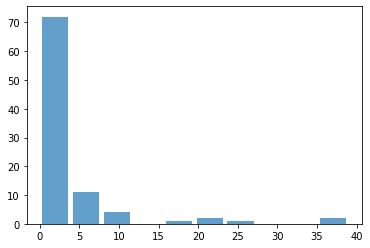

In [ ]:
import matplotlib.pyplot as plt
plt.hist(x=medals['Gold'],alpha=0.7,rwidth=0.85)

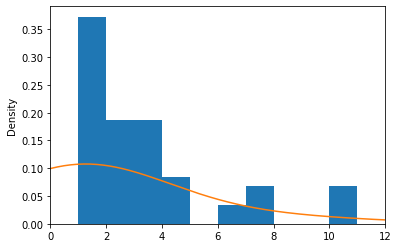

In [ ]:
#DENSITY PLOT AND ESTIMATES 
ax= medals['Gold'].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
medals['Gold'].plot.density(ax=ax)
ax.set_label('')

In [ ]:
#Exploring Binary and Categorical Data
medals['Gold'].mode()

0    0
dtype: int64

Text(0, 0.5, 'Gold Count ')

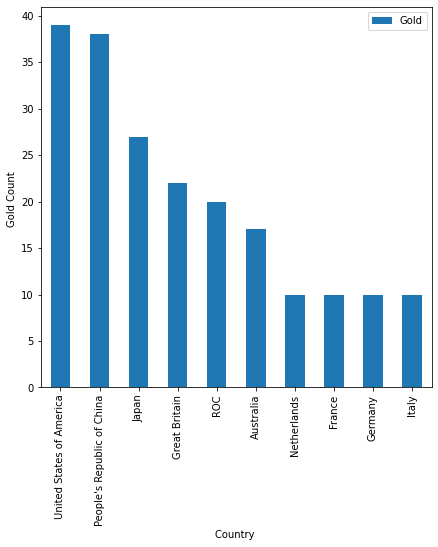

In [ ]:
#BAR CHART
ax=medals.iloc[:10,:].plot.bar(x='Team/NOC',y='Gold',figsize=(7,7))
ax.set_xlabel('Country ')
ax.set_ylabel('Gold Count ')

([<matplotlib.patches.Wedge at 0x7fe348f5ebd0>,
 [Text(-0.6243322674600585, 0.9056540287594277, 'United States of America'),
  Text(-1.0724207066739067, -0.2447730130080495, "People's Republic of China"),
  Text(-0.3673213244876795, -1.0368582567432336, 'Japan'),
  Text(0.4463732217985583, -1.0053611027194036, 'Great Britain'),
  Text(0.9637732416311904, -0.530227440553304, 'ROC'),
  Text(1.0973336402954277, 0.0765433333216221, 'Australia'),
  Text(0.9718633010825214, 0.5152491863253977, 'Netherlands'),
  Text(0.7687373318657108, 0.7867928028369274, 'France'),
  Text(0.49255203101681844, 0.9835611301496249, 'Germany'),
  Text(0.1695555234157106, 1.0868536812649736, 'Italy')],
 [Text(-0.3405448731600319, 0.4939931065960514, '19.2%'),
  Text(-0.5849567490948582, -0.13351255254984515, '18.7%'),
  Text(-0.2003570860841888, -0.5655590491326727, '13.3%'),
  Text(0.2434763027992136, -0.5483787833014928, '10.8%'),
  Text(0.5256944954351946, -0.2892149675745294, '9.9%'),
  Text(0.59854562197932

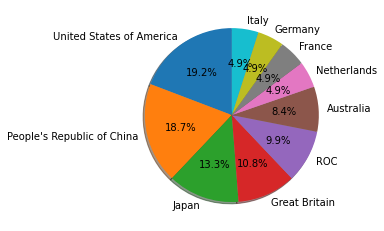

In [ ]:
#PIE CHARTS
pie_data=medals.iloc[:10,:]

plt.pie(pie_data['Gold'],labels=pie_data['Team/NOC'],shadow=True, startangle=90,autopct='%1.1f%%')

CORRELATION

In [ ]:
#Correlatıon matrix
medals.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


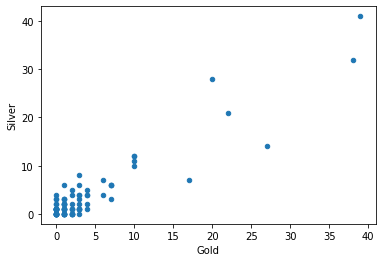

In [ ]:
medals.plot.scatter(x='Gold',y='Silver')

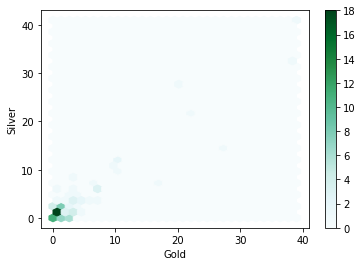

In [ ]:
medals.plot.hexbin(x='Gold',y='Silver',gridsize=30,sharex=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


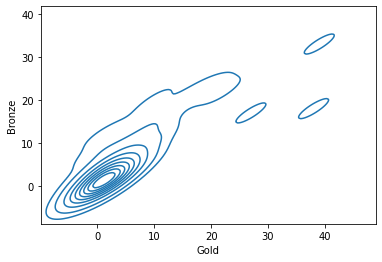

In [ ]:
import seaborn as sbn 
ax= sbn.kdeplot(medals['Gold'],medals['Bronze'])
ax

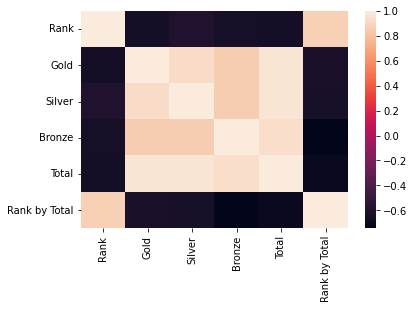

In [ ]:
#Heatmap
sbn.heatmap(medals.corr())

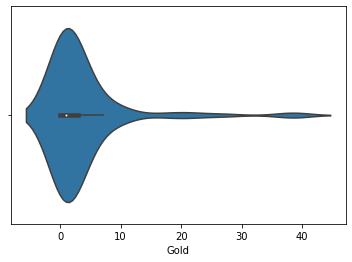

In [ ]:
#Violin Plots
sbn.violinplot(x=medals['Gold'])


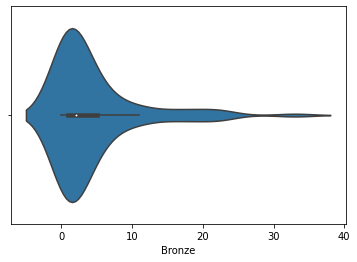

In [ ]:
sbn.violinplot(x=medals['Bronze'])